In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

This notebook is to explore the dataset and produce plots & tables
- distribution of age for each site
- distribution of confounds for each site
- how many case/control from each site for each condition

In [143]:
pheno_p = '/Users/harveyaa/Documents/masters/data/pheno_26-01-22.csv'
pheno = pd.read_csv(pheno_p,index_col=0)

datasets_p ='/Users/harveyaa/Documents/masters/neuropsych_mtl/datasets/{}.txt'

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_51602/2794670915.py:2: DtypeWarning: Columns (7,8,12,13,14,19,20,24,27,31,42,43,44,49,51,59,60,62,64,65,68,101,121,163) have mixed types. Specify dtype option on import or set low_memory=False.
  pheno = pd.read_csv(pheno_p,index_col=0)


In [144]:
cases = ['DEL15q11_2',
        'DUP15q11_2',
        'DUP15q13_3_CHRNA7',
        'DEL2q13',
        'DUP2q13',
        'DUP16p13_11',
        'DEL13q12_12',
        'DUP13q12_12',
        'DEL17p12',
        'TAR_dup',
        'DEL1q21_1',
        'DUP1q21_1',
        'DEL22q11_2',
        'DUP22q11_2',
        'DEL16p11_2',
        'DUP16p11_2',
        'SZ',
        'BIP',
        'ASD',
        'ADHD'
        ]

cases2 = ['DEL1q21_1',
        'DUP1q21_1',
        'DEL22q11_2',
        'DUP22q11_2',
        'DEL16p11_2',
        'DUP16p11_2',
        'SZ',
        'BIP',
        'ASD'
        ]

ipc = ['ASD','BIP','ASD','ADHD']

In [145]:
pheno[cases].sum()

DEL15q11_2           103.0
DUP15q11_2           136.0
DUP15q13_3_CHRNA7    191.0
DEL2q13              183.0
DUP2q13               88.0
DUP16p13_11           41.0
DEL13q12_12           22.0
DUP13q12_12           20.0
DEL17p12              16.0
TAR_dup               29.0
DEL1q21_1             25.0
DUP1q21_1             19.0
DEL22q11_2            43.0
DUP22q11_2            22.0
DEL16p11_2            32.0
DUP16p11_2            35.0
SZ                   283.0
BIP                   44.0
ASD                  472.0
ADHD                 223.0
dtype: float64

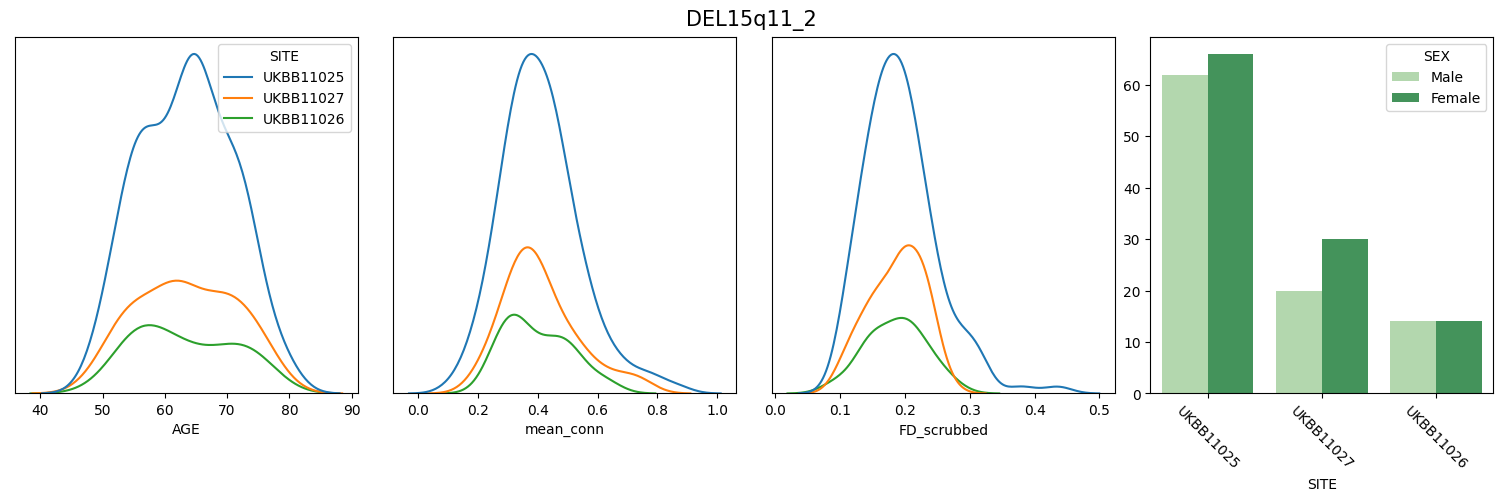

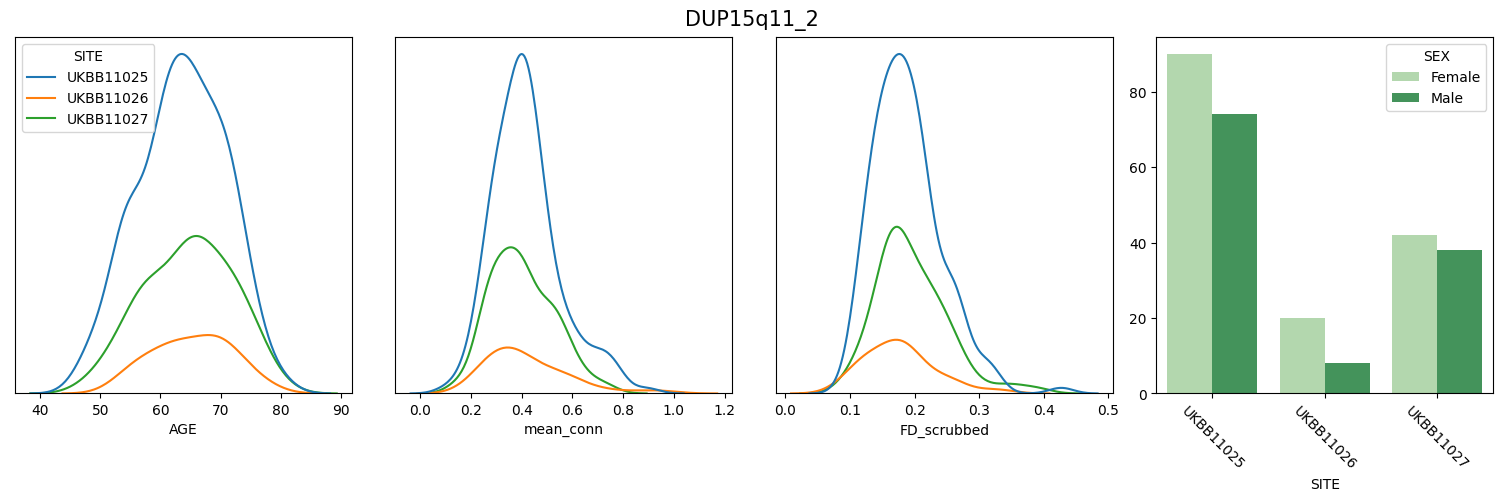

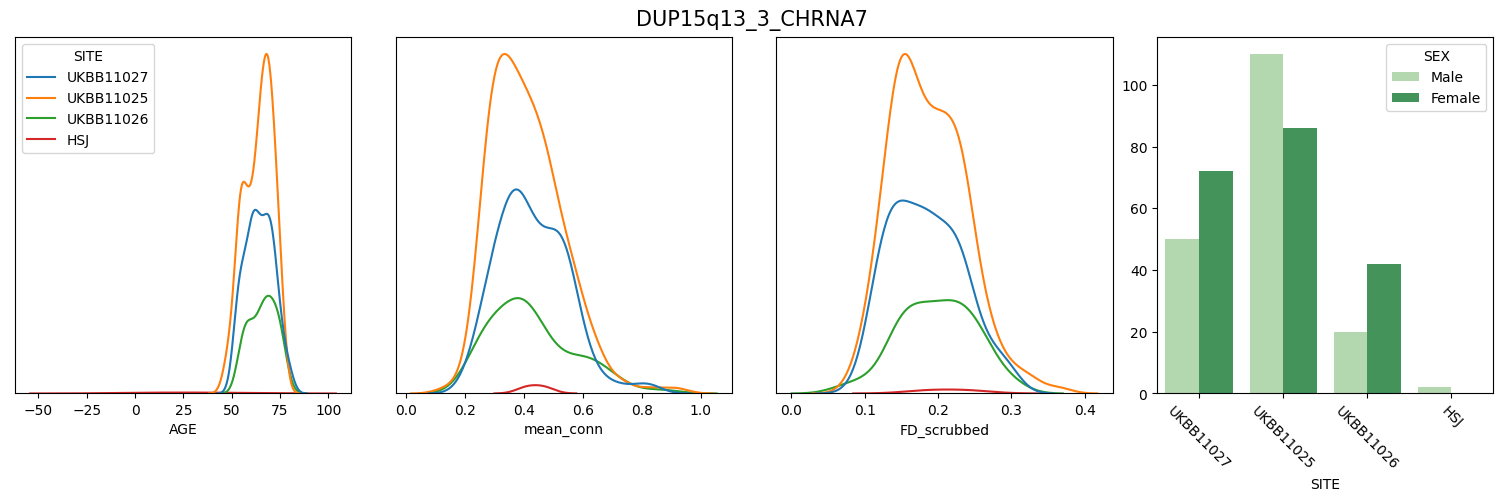

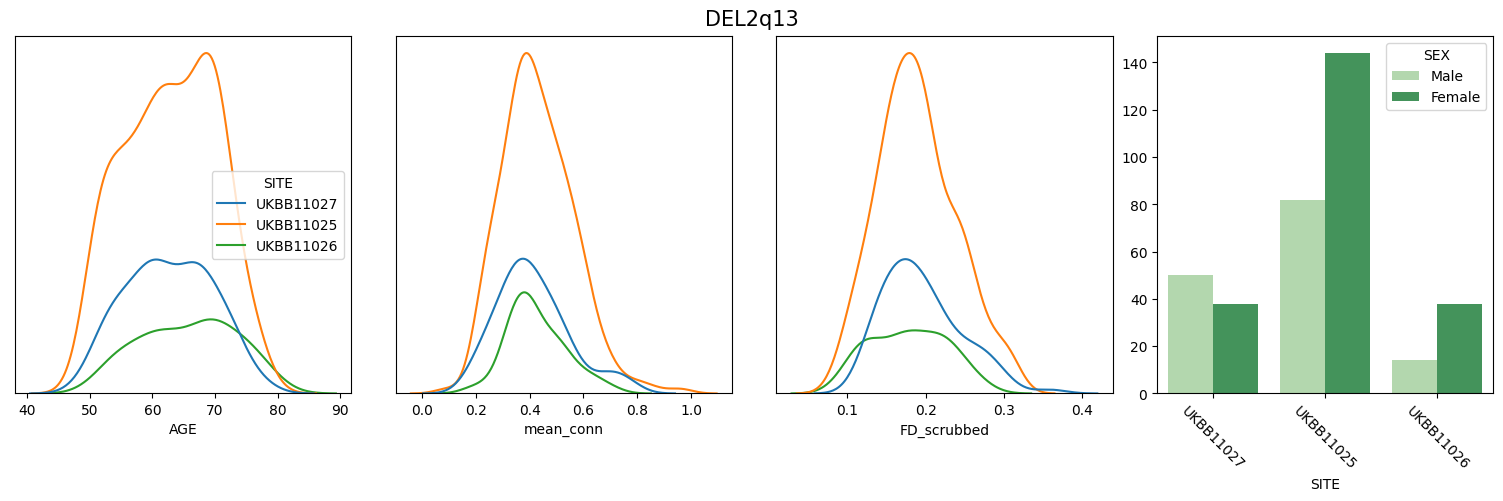

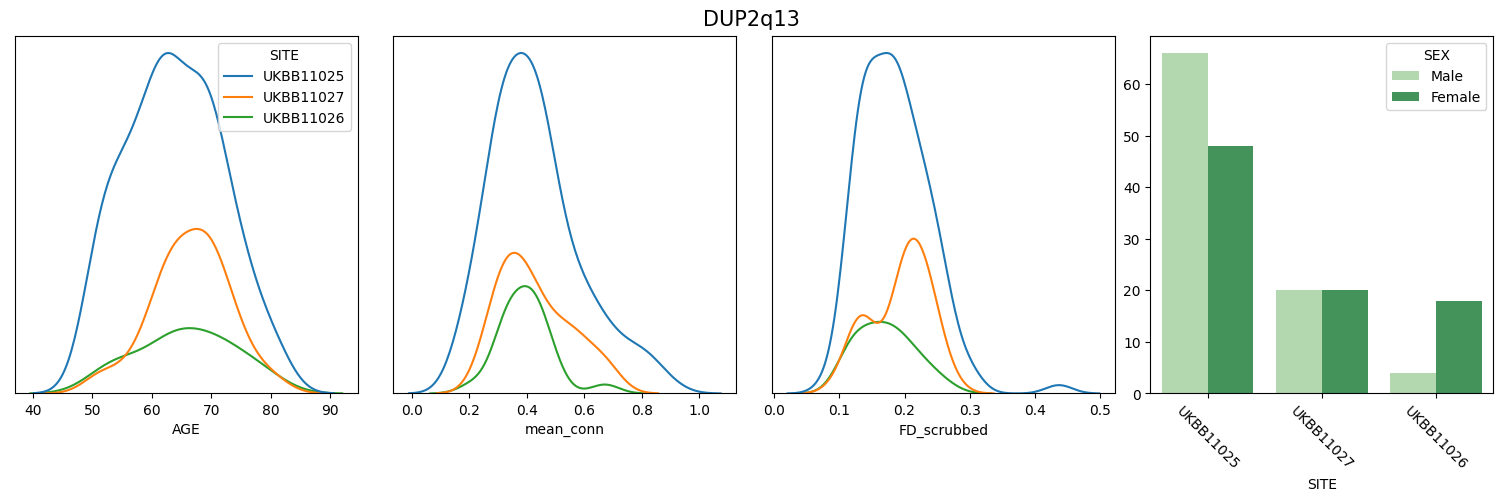

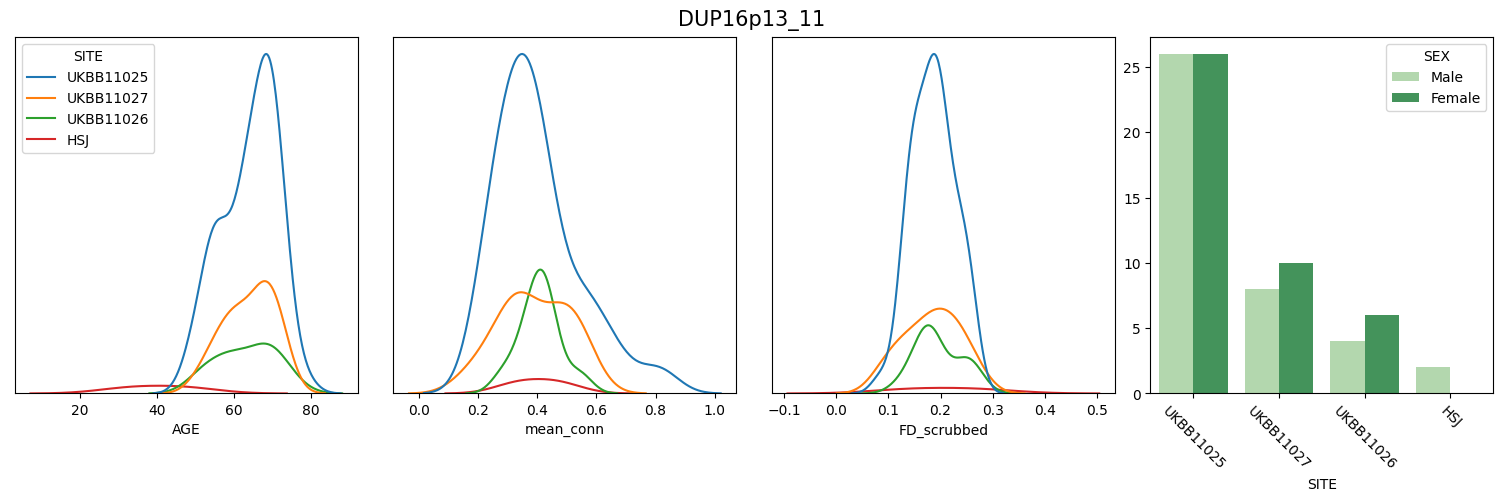

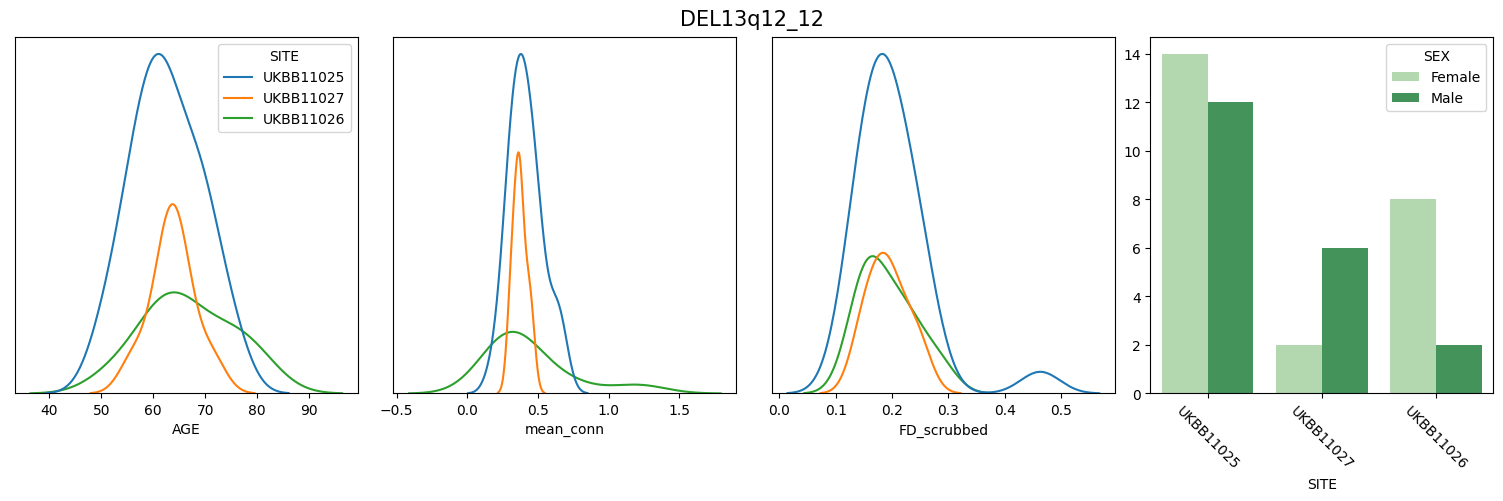

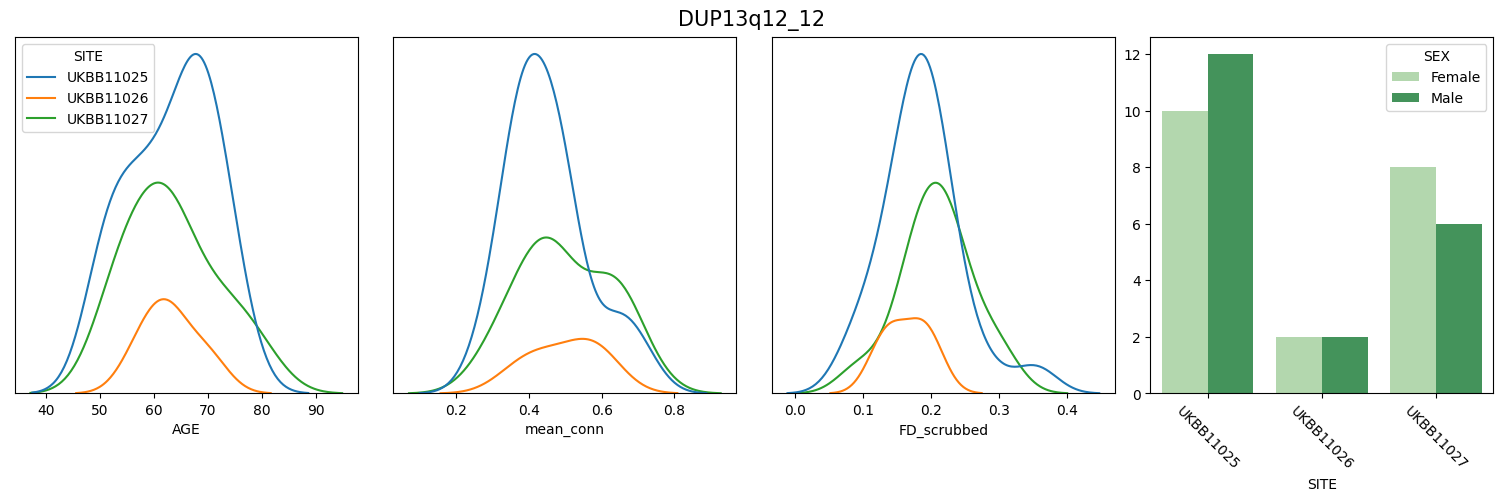

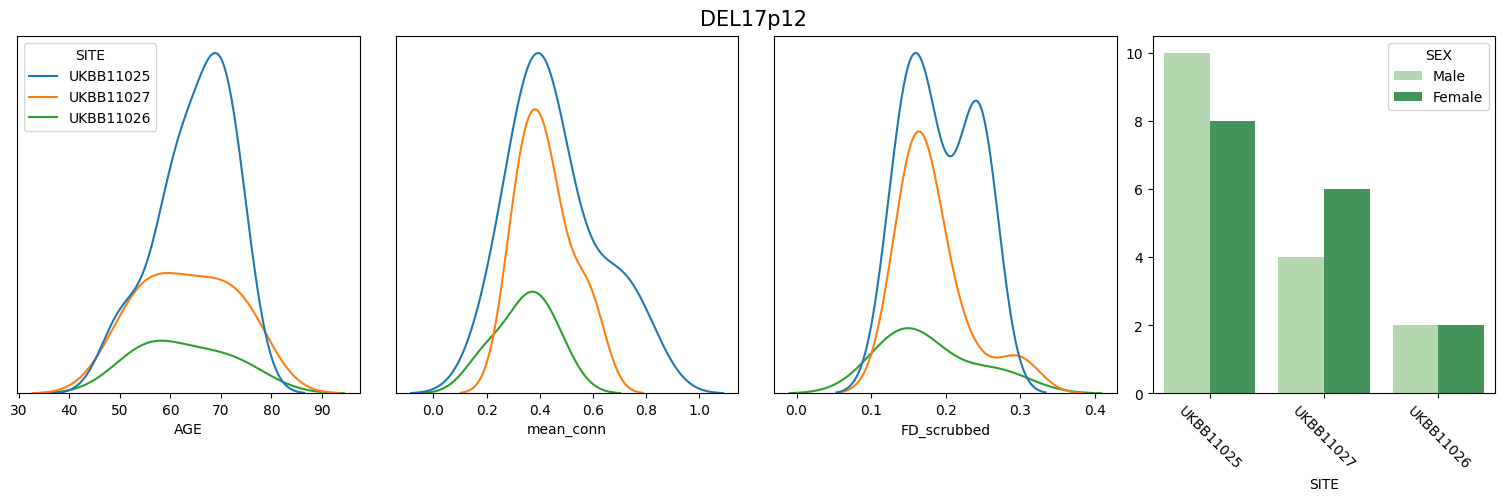

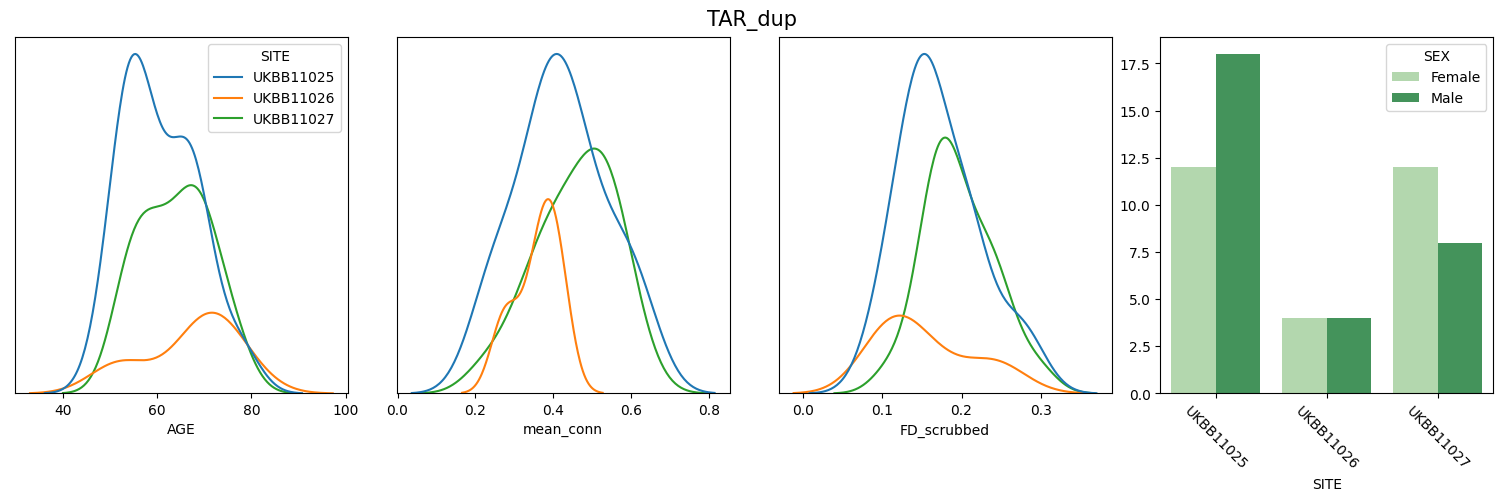

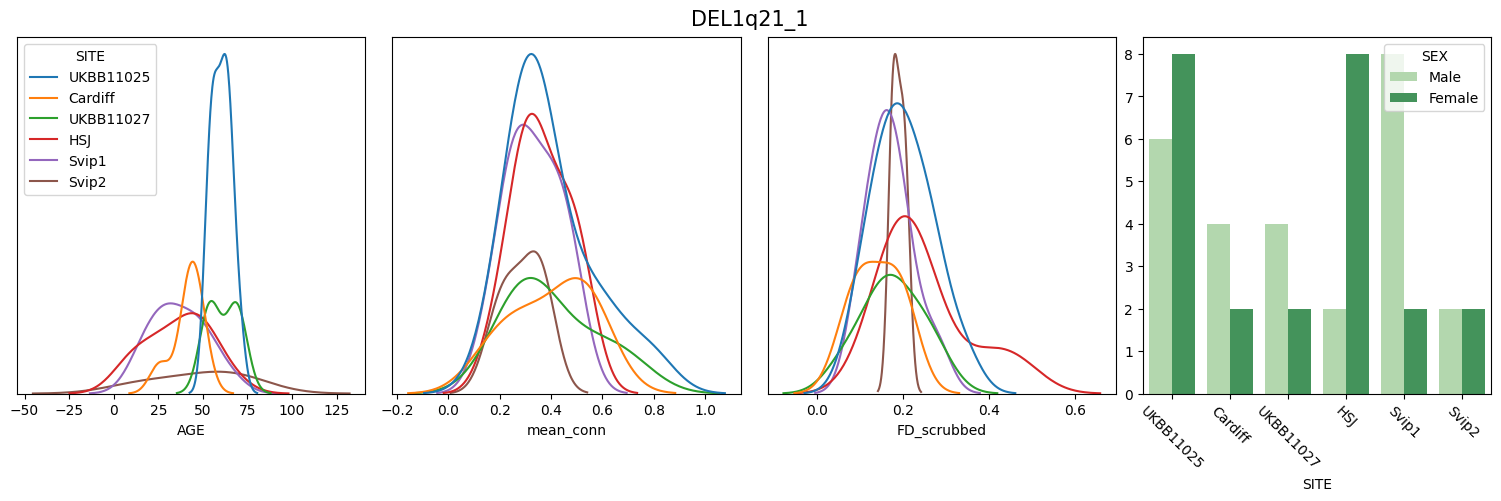

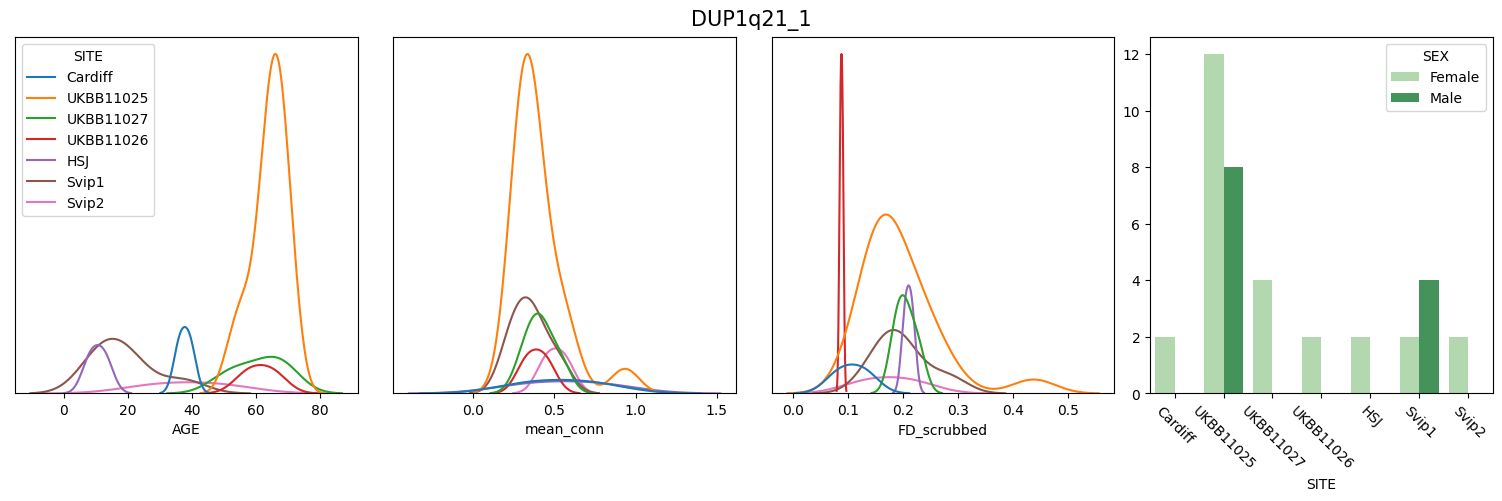

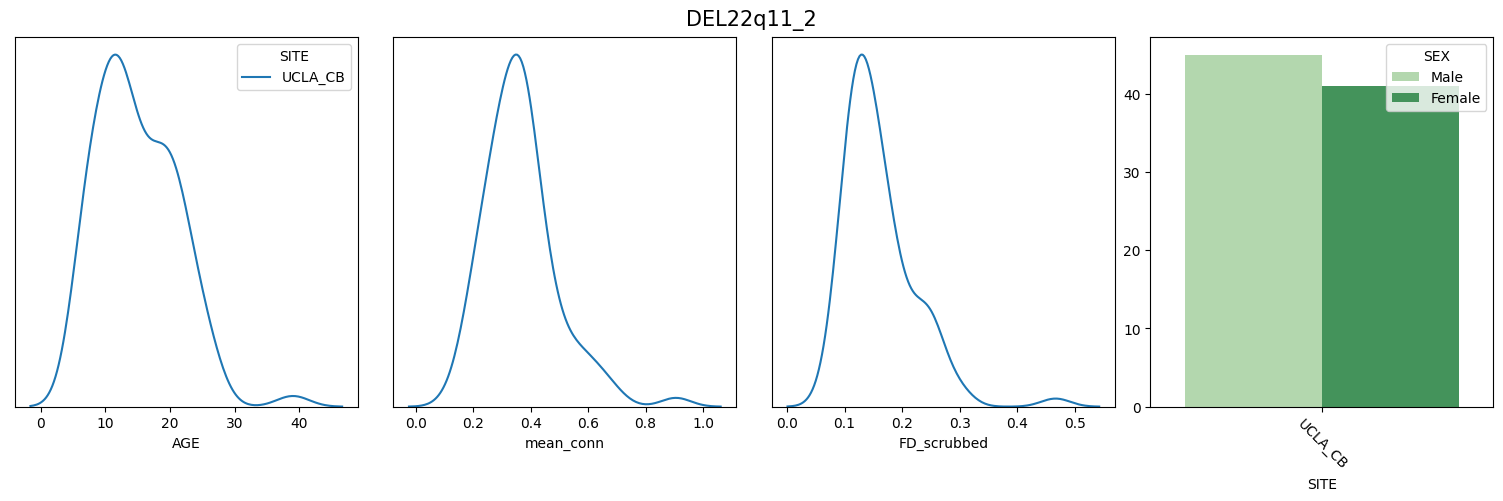

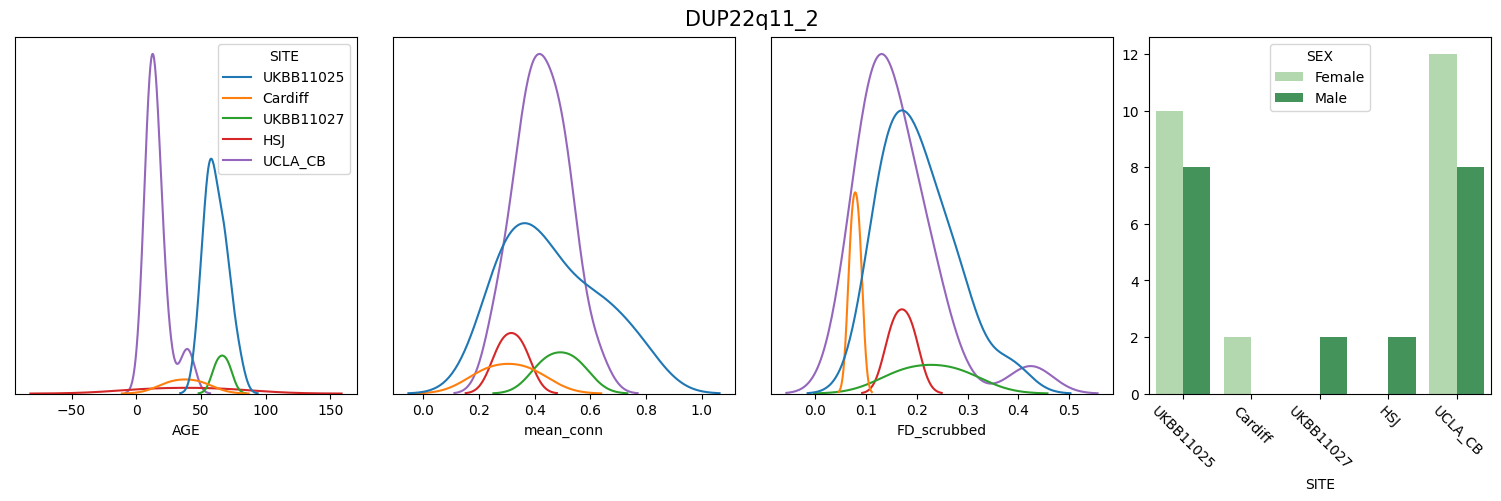

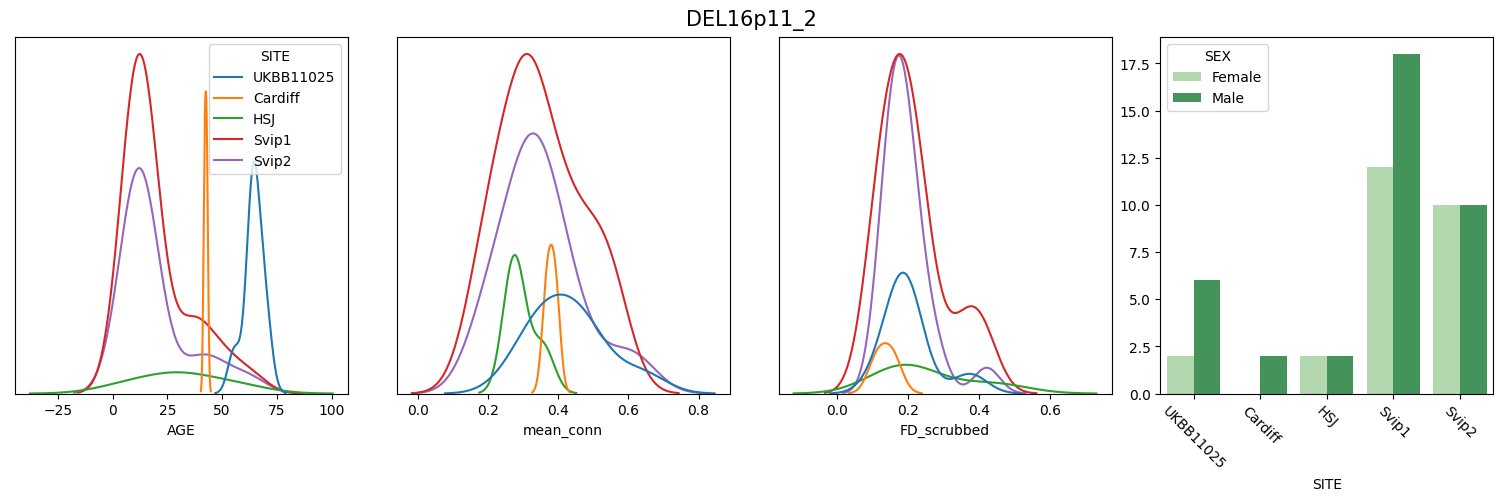

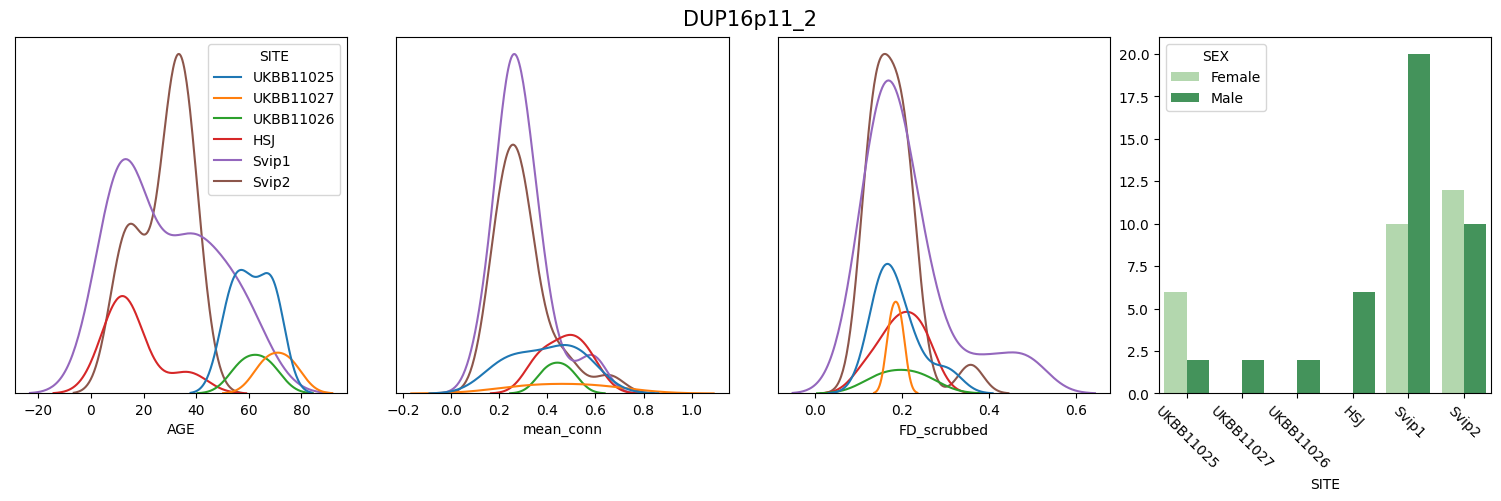

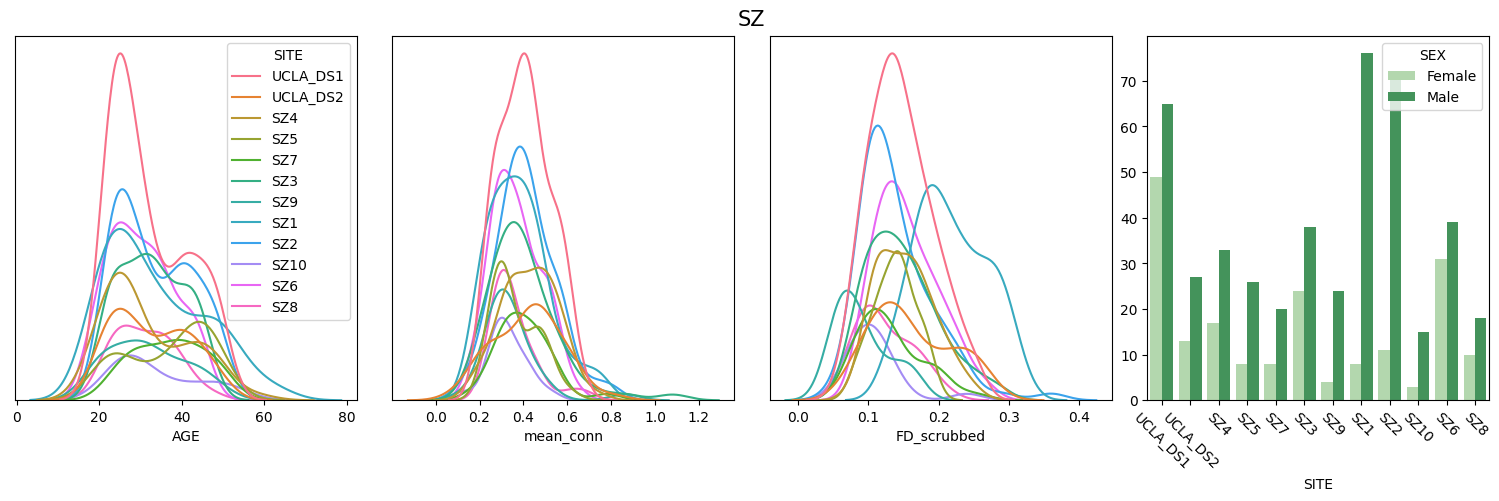

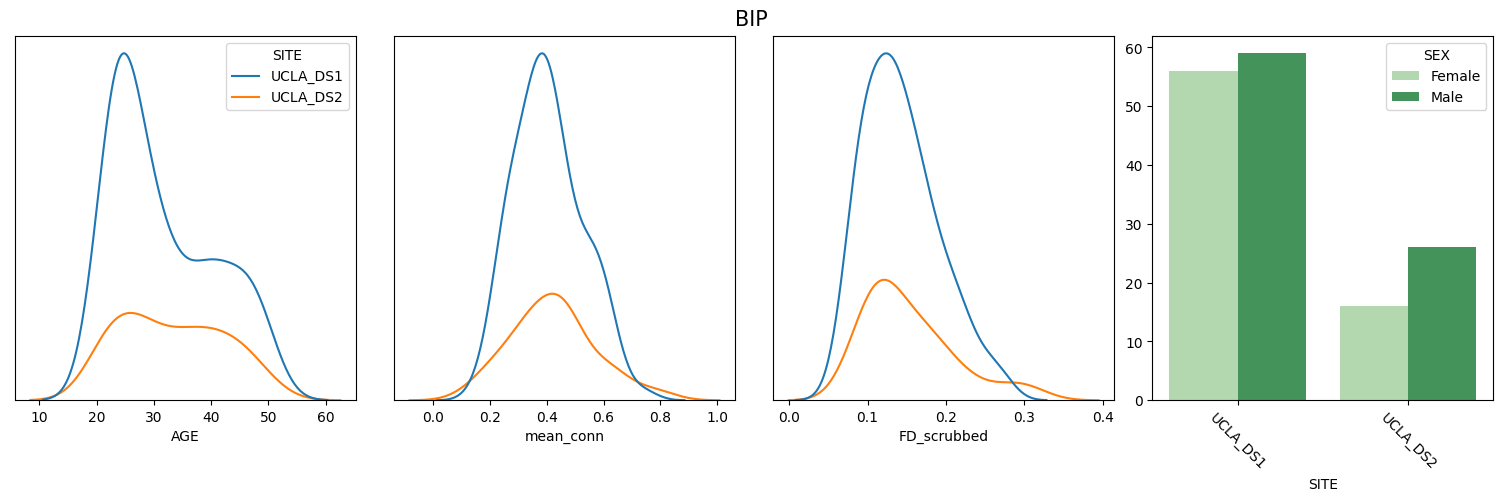

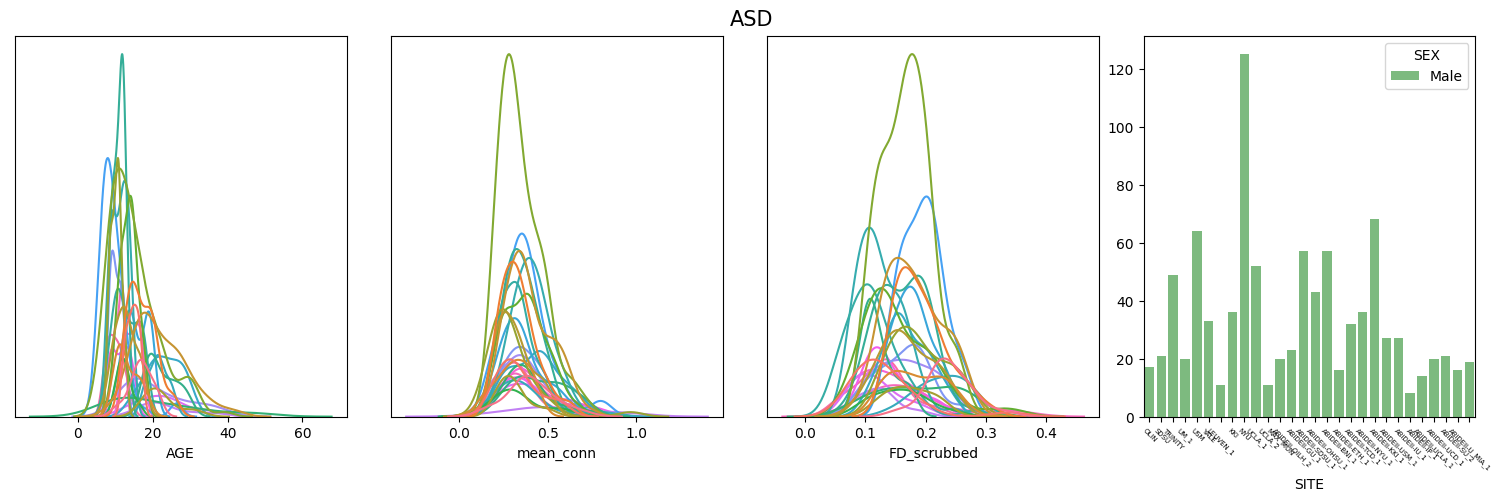

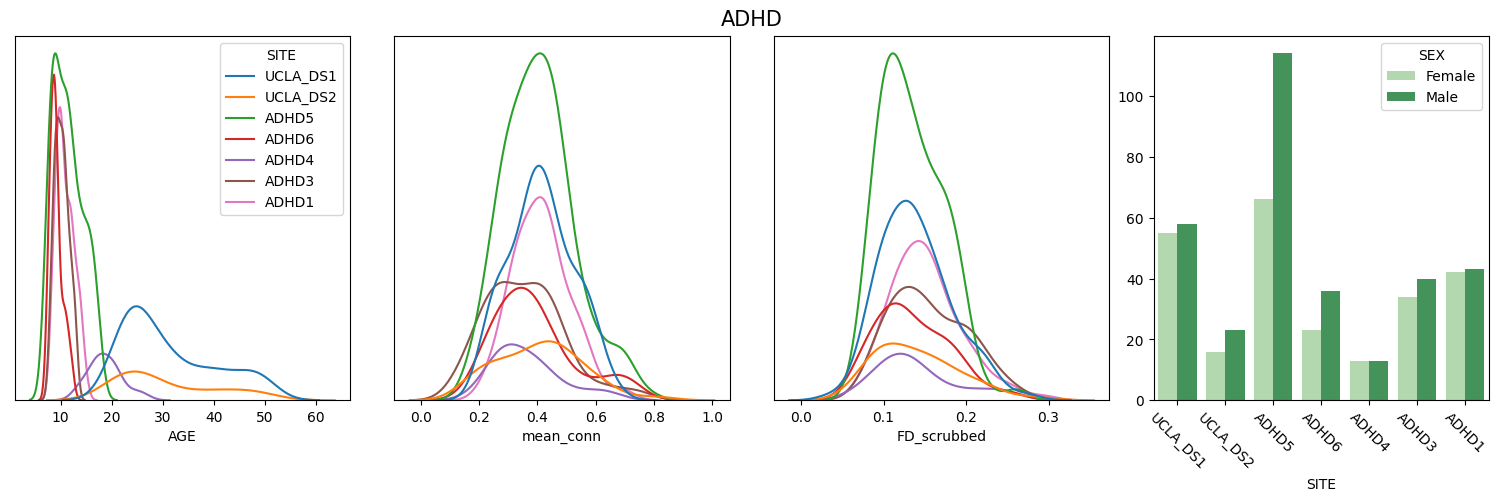

In [146]:
for case in cases:
    ids = pd.read_csv(datasets_p.format(case),header=None)
    df = pheno[pheno.index.isin(ids[0])].copy()

    fig, ax = plt.subplots(1,4, figsize=(15,5))

    if case == 'ASD':
        sns.kdeplot(x = 'AGE', data = df,hue = 'SITE',ax=ax[0],legend=False)
    else:
        sns.kdeplot(x = 'AGE', data = df,hue = 'SITE',ax=ax[0])
    sns.kdeplot(x = 'mean_conn', data = df,hue = 'SITE',ax=ax[1],legend=False)
    sns.kdeplot(x = 'FD_scrubbed', data = df,hue = 'SITE',ax=ax[2],legend=False)
    sns.countplot(data=df, x="SITE",hue='SEX',ax=ax[3],palette='Greens')

    for i in range(3):
        ax[i].set_yticks([])
    for i in range(4):
        ax[i].set_ylabel('')
        
    if case == 'ASD':
        ax[3].set_xticklabels(ax[3].get_xticklabels(),rotation = 315,fontsize=5)
    else:
        ax[3].set_xticklabels(ax[3].get_xticklabels(),rotation = 315)

    plt.suptitle(case,fontsize=15)
    plt.tight_layout(pad=0.6)

In [138]:
case = 'DUP1q21_1'
sites = pheno[pheno[case]==1]['SITE'].unique()
sites

array(['UKBB11025', 'UKBB11027', 'UKBB11026', 'Cardiff', 'HSJ', 'Svip1',
       'Svip2'], dtype=object)

In [139]:
pheno[(pheno['SITE'].isin(sites)) & ((pheno[case]==1)|(pheno['non_carriers']==1))].groupby('SITE').sum()[['non_carriers',f'{case}']]

/var/folders/5x/9dwn0lbx633gccy22ts5bskh0000gn/T/ipykernel_51602/3198005996.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pheno[(pheno['SITE'].isin(sites)) & ((pheno[case]==1)|(pheno['non_carriers']==1))].groupby('SITE').sum()[['non_carriers',f'{case}']]


,non_carriers,DUP1q21_1
SITE,,
Cardiff,8.0,1.0
HSJ,39.0,1.0
Svip1,48.0,3.0
Svip2,36.0,1.0
UKBB11025,17673.0,10.0
UKBB11026,4569.0,1.0
UKBB11027,7943.0,2.0


In [134]:
pheno[pheno[case]==1].groupby('SITE').count()[case].to_dict()

{'Cardiff': 1, 'HSJ': 2, 'Svip1': 15, 'Svip2': 10, 'UKBB11025': 4}